In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image

## M1.1 Understand the distribution and measures of center for US opioid mortality for 2019

#### Import the super dataframe created in Stage I

In [3]:
#read CSV file 
super_df = pd.read_csv("../../../../data/stage_2/super_df.csv")

In [3]:
super_df.shape

(2527, 543)

In [4]:
super_df.head(5)

,Unnamed: 0,County,County Code,Population,Deaths,Norm_deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
0,0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4
1,1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2
2,2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
3,3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8
4,4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3


In [5]:
super_df.columns

Index(['Unnamed: 0', 'County', 'County Code', 'Population', 'Deaths',
       'Norm_deaths', 'State FIPS Code', 'County FIPS Code',
       '5-digit FIPS Code', 'State Abbreviation',
       ...
       'Total male population raw value', 'Female population 0-17 raw value',
       'Female population 18-44 raw value',
       'Female population 45-64 raw value', 'Female population 65+ raw value',
       'Total female population raw value', 'Population growth raw value',
       'State', 'FIPS', 'Opiod_Dispensing_Rate'],
      dtype='object', length=543)

#### Create a histogram of Normalized Deaths variable for entire US as a distribution.
- Add a vertical line to the histogram representing the mean Normalized Opioid Death for US
- Add another line for median to compare

#### The mean for the entire US can can be achieved from the dataset as it has county level information. Either we group by county or state and then find the mean all would result the same. Since the data is at county level I calculated the mean. 

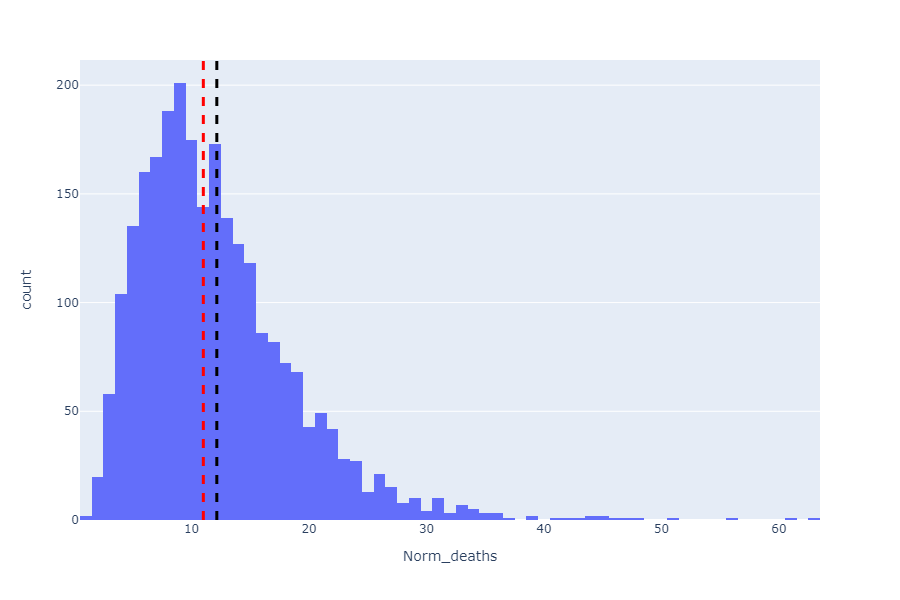

In [6]:
norm_data = px.histogram(super_df, x="Norm_deaths")
norm_data.add_vline(x= super_df.Norm_deaths.mean(), line_width=3, line_dash="dash", line_color="black")
norm_data.add_vline(x= super_df.Norm_deaths.median() , line_width=3, line_dash="dash", line_color="red")

# norm_data.write_image("images/hist.jpeg")
# img_bytes = norm_data.to_image(format="png",width=900, height=600)
# Image(img_bytes)
norm_data.show()

### Inference  from the above diagram

* From the above histogram the mean is a black dashed line and median is red dashed line
* The mean is 12 and median is 11
* The histogram is ploted to understand the distribution of the data and tells how frequently every value in a data set is repeated
* The data is right skewed or positive skew , this means most of the data is near the lower range and as the no. of deaths increases the values become less frequent
* When the distribution of data is right skewed the mean is on the right side and mode is on the left. To get both mean and median symmetrical , the deaths data near the tail should be added to get a symmetrical distribution or normal distribution.
* The mean gets pulled towards the outliers and median resists this pull and hence median is known to be robust comapared to mean. So it is always better to get the median value of deaths to understand the data more clearly. 
* Death is a discrete variable we cannot have deaths as decimals thus its a discrete random variable.

## M1.2 Understand variable to mortality relationships for 2019 data 

#### codify the column Normalized Deaths (Number of Deaths per 100k Population - Norm_Deaths) and store it as a label column.

In [7]:
super_df.Norm_deaths.describe()

count    2527.000000
mean       12.148002
std         6.768092
min         1.000000
25%         7.000000
50%        11.000000
75%        15.000000
max        63.000000
Name: Norm_deaths, dtype: float64

#### To perform this task I used cut() function of pandas that will segment the data into the range of values we need and assign the labels to those ranges. The dataset had few values which was not covered in the range mentioned by the professor. So I changed my range for  Very Low - [0.99- 8.0]. There were few deaths equal to one so inorder to label it as very low I used the range as mentioned. 

* https://pandas.pydata.org/docs/reference/api/pandas.cut.html

### Death category column is created by dividing the death values in the desired range by assigning the labels to the mentioned ranges. 

In [8]:
super_df['death_category'] = pd.cut(super_df.Norm_deaths, [0.99 ,8 ,11, 16,64] , labels=['Very Low','Low','high','Very High'])

In [9]:
super_df.head()

,Unnamed: 0,County,County Code,Population,Deaths,Norm_deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,...,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,death_category
0,0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,...,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4,Very Low
1,1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2,Very High
2,2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,...,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4,Low
3,3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,...,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8,high
4,4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,...,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3,Low


In [10]:
#checking if there were any null values
super_df.Norm_deaths.isnull().sum()

0

In [11]:
super_df[['Norm_deaths' , 'death_category' ]]

,Norm_deaths,death_category
0,7.0,Very Low
1,19.0,Very High
2,11.0,Low
3,12.0,high
4,11.0,Low
...,...,...
2522,11.0,Low
2523,11.0,Low
2524,12.0,high
2525,6.0,Very Low


### Thus from the above result we see that for the Norm_deaths value the range and labels assigned are as follows: 
 - Very Low  - [0.99 - 8.0]
 - Low  - [8.0 - 11.0]
 - High  - [11.0 - 16.0]
 - Very High - [16.0 - 64.0]

##  Plot a second variable to Normalized Mortality in a scatter plot to observe any trends and decribe the trends 

#### For this task I considered the variables from stage 1 and also used other variables which was not listed in stage one as the correlation was strong.

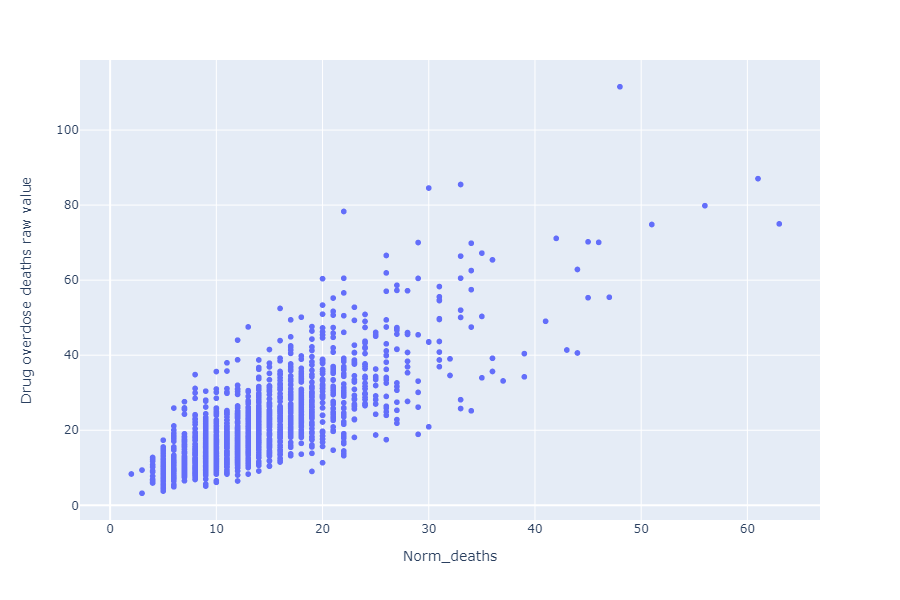

In [12]:
fig = px.scatter(super_df , x="Norm_deaths" , y='Drug overdose deaths raw value')
# fig.write_image("images/drug_overdose.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

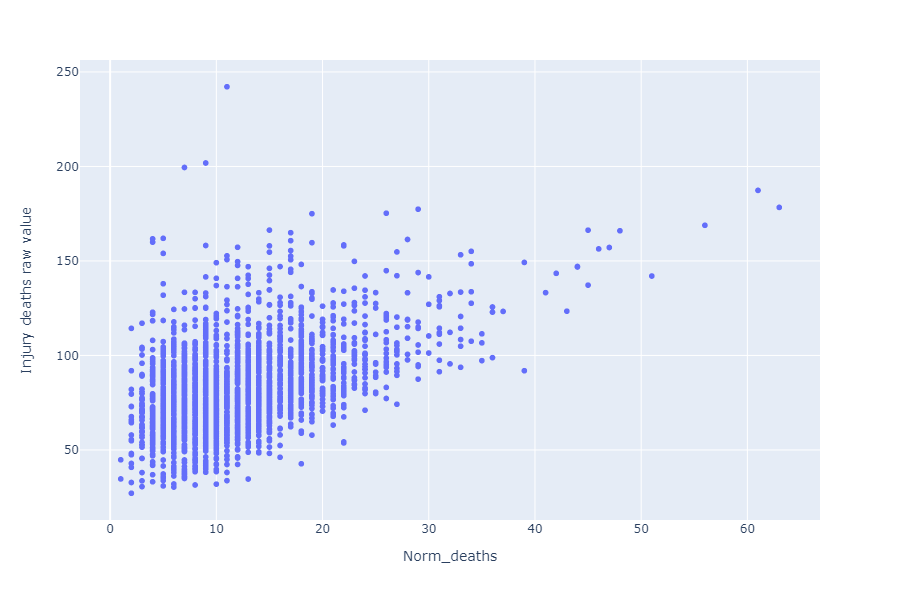

In [13]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Injury deaths raw value')
# fig.write_image("images/injury_death.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

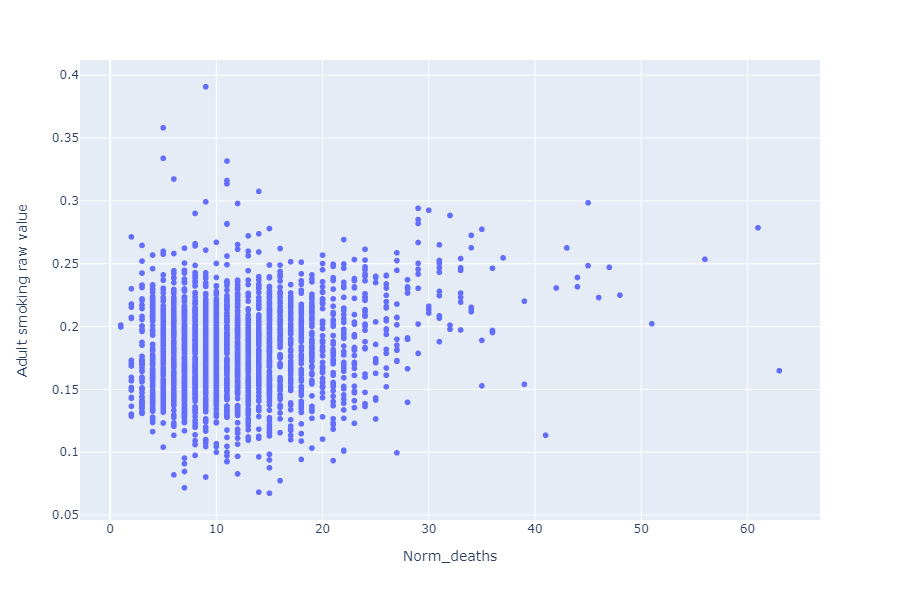

In [14]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Adult smoking raw value')
# fig.write_image("images/adult_smoking.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

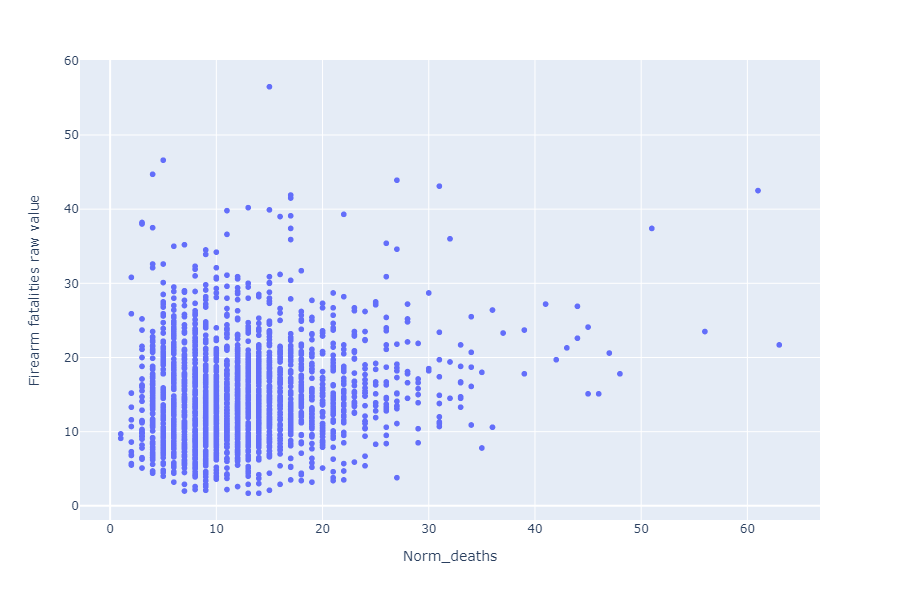

In [15]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Firearm fatalities raw value')
# fig.write_image("images/firearm_fatalities.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

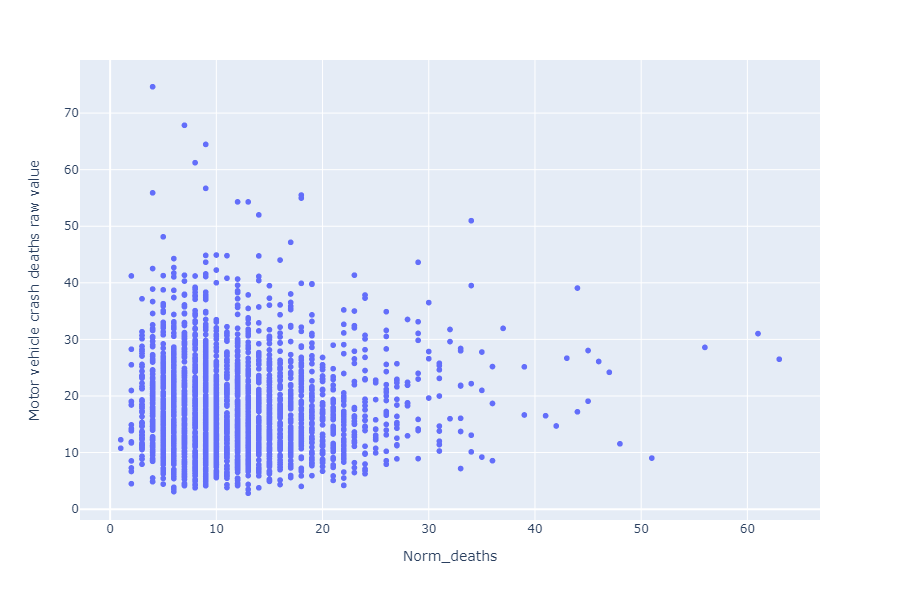

In [16]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Motor vehicle crash deaths raw value')
# fig.write_image("images/motor_vehicle_crash.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

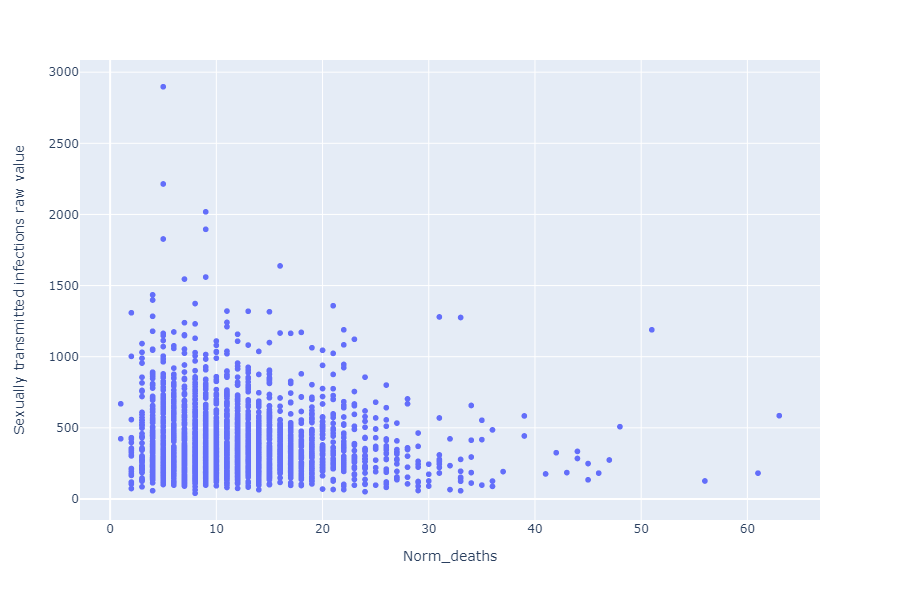

In [17]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Sexually transmitted infections raw value')
# fig.write_image("images/sexually_transmitted.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

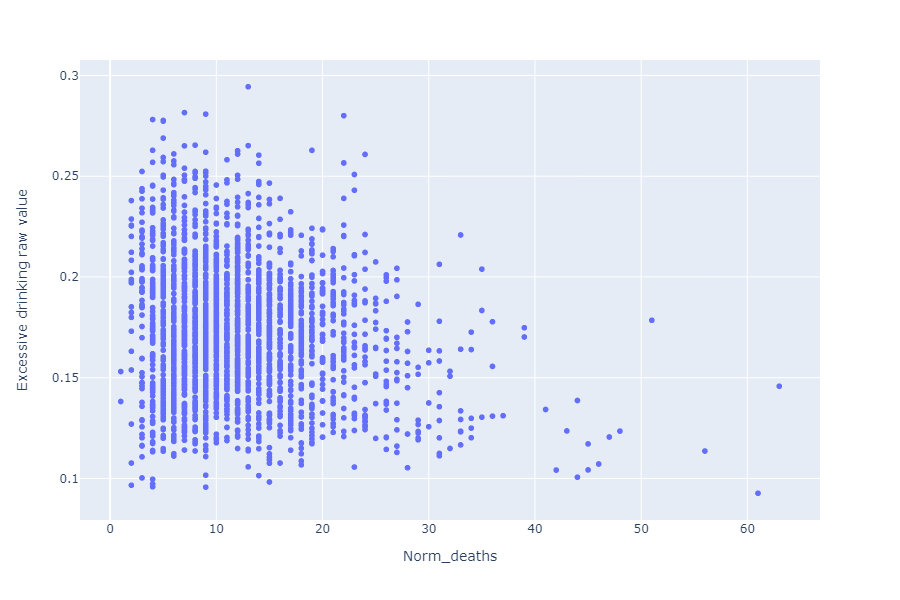

In [18]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Excessive drinking raw value')
# fig.write_image("images/excessive_drinking.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

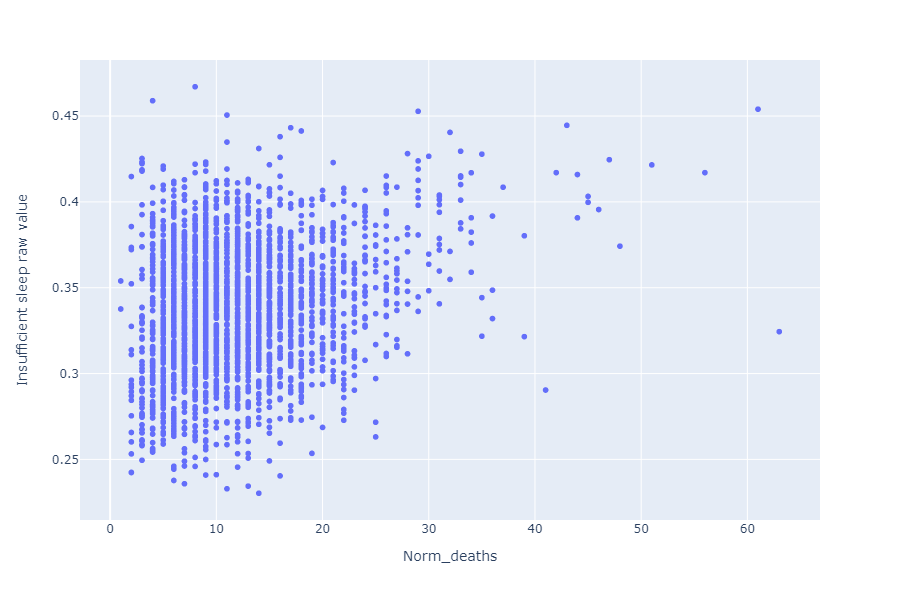

In [19]:
fig = px.scatter(super_df , x="Norm_deaths" , y= 'Insufficient sleep raw value')
# fig.write_image("images/Insufficient_sleep.png")
# img_bytes = fig.to_image(format="png",width=900, height=600)
# Image(img_bytes)
fig.show()

### Describe any trends you observe

From the above scatterplots we are trying to co-relate the 2 variables. The scatterplot shows how the two variables are related whether there is positive correlation or negative correlation. 

The Deaths variable with Drug overdose deaths raw value, Insufficient sleep raw value and Injury deaths raw value are positively correlated. We see a positive increasing slope and hence both the variables are positively co-related. The rest other graphs show a slight increase in their slopes and are positively related. These variables show a strong relation compared to others.

From the reports and the research it was observed that with the intake of drugs there were many overdose cases that were reported which led to death. So as read through the reports, there were other drugs that was being mixed along with opiod. So knowingly unknowingly people consumed the drugs which led to the overdose and we see there was increase in the number in the graph. 

With variable Injury death and firearm fatalities and motor vehicle accidents are also correlated. With the intake of drugs people were not having control over their mind and also not alert while driving the vehicles, this again led to the increase in deaths value and so  we see a very strong correlation with Norm_Death values them. The rest variables also follow the name trend but sexually transmitted infections surprisingly shows no only a slight increase not much. So I infer that though syringes were exchanged for intake of drugs the deaths were not because of this act. Even if they were very few deaths occured because of it. 

When comes to data points the values are more close and not scattered from each other this tells us how that the correlation is high as there is high possibility of a line in the graph. The scatter plot also shows outliers as we move to the higher norm_death values. 

### Extra credit

I created a drop down with variables listed in the stage 1. On selecting the variables the graph changes and you will be able to see the graphs and compare the trends. Below is the reference are the site. 

    * https://plotly.com/python/figurewidget-app/
    * https://ipywidgets.readthedocs.io/en/7.6.2/examples/Using%20Interact.html

###  The below is the code for dynamic ipywidget. When you click on each of the dropdowns a scatter plot is seen. Please check the video to see the dashboard as its not rendering on Github.

In the below code drop_down variable stores all the information that should be displayed in a dropdown.

In [20]:
from ipywidgets import interact, Dropdown

In [21]:
from ipywidgets import widgets
from plotly.offline import  iplot


drop_down = widgets.Dropdown(options= ['Excessive drinking raw value',
       'Injury deaths raw value', 'HIV prevalence raw value',
       'Drug overdose deaths raw value', 'Motor vehicle crash deaths raw value',
       'Firearm fatalities raw value','Insufficient sleep raw value' , 'Adult smoking raw value', 
       'Primary care physicians raw value',  'Mental health providers raw value'] ,
                                description='Variable', 
                                disabled=False)


def plot_scatter(col2):
   
        fig1 = px.scatter(super_df , x="Norm_deaths" , y=col2)
        iplot(fig1)
        

output_graph = widgets.interactive_output(plot_scatter , {'col2' : drop_down })
display(drop_down , output_graph)


Dropdown(description='Variable', options=('Excessive drinking raw value', 'Injury deaths raw value', 'HIV prev…

Output()

### The screenshots of few variables from above dropdown created are present in the folder of member task please have a look or run the file to view the dropdown graphs.¶